In [1]:
import panel as pn

from panel.layout.gridstack import GridStack

pn.extension('gridstack')

The ``GridStack`` layout allows arranging multiple Panel objects in a grid using a simple API to assign objects to individual grid cells or to a grid span. Other layout containers function like lists, but a `GridSpec` has an API similar to a 2D array, making it possible to use 2D assignment to populate, index, and slice the grid.

#### Parameters:

For layout and styling related parameters see the [customization user guide](../../user_guide/Customization.ipynb).

* **``allow_resize``** (bool): Whether to allow resizing grid cells.
* **``allow_drag``** (bool): Whether to allow dragging grid cells.
* **``ncols``** (int): Allows specifying a fixed number of columns (otherwise grid expands to match assigned objects)
* **``nrows``** (int): Allows specifying a fixed number of rows (otherwise grid expands to match assigned objects)
* **``mode``** (str): Whether to 'warn', 'error', or simply 'override' on overlapping assignment
* **``objects``** (list): The list of objects to display in the GridSpec. Should not generally be modified directly except when replaced in its entirety.

___

A ``GridStack`` can be created either with a fixed size (the default) or with responsive sizing. In both cases the ``GridSpec`` will modify the contents to ensure the objects fill the grid cells assigned to them.

To demonstrate this behavior, let us declare a responsively sized ``GridStack`` and then assign ``Spacer`` objects with distinct colors. We populate a ``6x12`` grid with these objects and display it:

In [2]:
gstack = GridStack(sizing_mode='stretch_both')

gstack[ : , 0: 3] = pn.Spacer(background='red',    margin=0)
gstack[0:2, 3: 9] = pn.Spacer(background='green',  margin=0)
gstack[2:4, 6:12] = pn.Spacer(background='orange', margin=0)
gstack[4:6, 3:12] = pn.Spacer(background='blue',   margin=0)
gstack[0:2, 9:12] = pn.Spacer(background='purple', margin=0)

gstack

GridStack(ncols=12, nrows=6, sizing_mode='stretch_both')
    [0] Spacer(background='red', margin=0, sizing_mode='stretch_both')
    [1] Spacer(background='green', margin=0, sizing_mode='stretch_both')
    [2] Spacer(background='orange', margin=0, sizing_mode='stretch_both')
    [3] Spacer(background='blue', margin=0, sizing_mode='stretch_both')
    [4] Spacer(background='purple', margin=0, sizing_mode='stretch_both')

As we can see the fixed-size ``GridStack`` fills the `800x600` pixels assigned to it and each of the Spacer objects has been resized to fill the alloted grid cells, including the empty grid cell in the center. A convenient way to get an overview of the grid without rendering it is to display the ``grid`` property, which returns an array showing which grid cells have been filled:

In [ ]:
gstack.grid

In addition to assigning objects to the grid we can also index the grid:

In [ ]:
pn.Row(gstack[2, 2], width=400, height=400)

And select a subregion using slicing semantics:

In [ ]:
gstack[0, 1:]

The behavior when replacing existing grid cells can be controlled using the ``mode`` option. By default the ``GridStack`` will warn when assigning to one or more grid cells that are already occupied. The behavior may be changed to either error or override silently, by setting ``mode='error'`` or ``mode='override'`` respectively.

### Fixed size grids

We can also set explicit `width` and `height` values on a `GridStack`. Just like in the responsive mode, the ``GridStack`` will automatically set the appropriate sizing values on the grid contents to fill the space correctly. This means that when we resize a component and the state is synced with Python the new size is computed there and only then is the display updated:

PNG(str, height=75, sizing_mode='fixed', width=75)
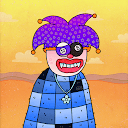

In [59]:
jpg_pane_4 = pn.pane.JPG('https://www.gstatic.com/webp/gallery/4.sm.jpg', width=500)
jpg_pane_5 = pn.pane.JPG('https://www.gstatic.com/webp/gallery/5.sm.jpg', width=500)
jpg_pane_1 = pn.pane.PNG('unnamed.png', height=75, width=75)
jpg_pane_2 = pn.pane.JPG('https://www.gstatic.com/webp/gallery/2.sm.jpg', width=500)
jpg_pane_3 = pn.pane.JPG('https://www.gstatic.com/webp/gallery/3.sm.jpg', width=500)
jpg_pane_1

GridStack(ncols=3, nrows=5, sizing_mode='stretch_both')
    [0] PNG(str, height=75, sizing_mode='stretch_both', width=75)
    [1] Str(str, sizing_mode='stretch_both')
    [2] JPG(str, sizing_mode='stretch_both', width=500)
    [3] JPG(str, sizing_mode='stretch_both', width=500)
    [4] JPG(str, sizing_mode='stretch_both', width=500)
    [5] Column(sizing_mode='stretch_both')
        [0] FloatSlider()
        [1] ColorPicker()
        [2] Toggle()
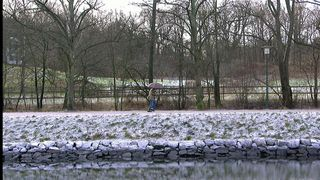
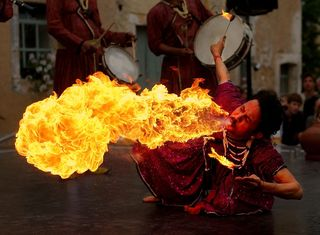
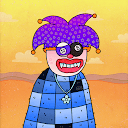
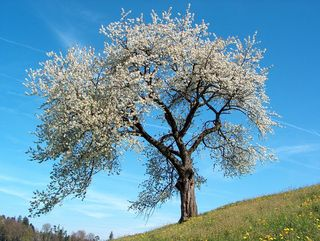

In [61]:
import holoviews as hv
import holoviews.plotting.bokeh

from bokeh.plotting import figure

# fig = figure()
# fig.scatter([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 2, 1, 0, -1, -2, -3])

gstack = GridStack(sizing_mode='stretch_both')

gstack[0,0 :1] = jpg_pane_1
gstack[1:3, 0] = pn.pane.Str('test')
gstack[1:3, 1:3] = jpg_pane_3
gstack[3:5, 0] = jpg_pane_4
gstack[3:5, 1] = jpg_pane_5
gstack[3:5, 2] = pn.Column(
    pn.widgets.FloatSlider(),
    pn.widgets.ColorPicker(),
    pn.widgets.Toggle(name='Toggle Me!')
)

gstack